# Introduction 
In this notebook, we'll be investigating some data from the [Department of Education, Training, and Employment](https://en.wikipedia.org/wiki/Department_of_Employment,_Education_and_Training) (DETE). The original data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We'll also be investigating some data from the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) in Queensland, Australia. Both datasets are employee exit surveys.

![Terminator](figures/terminate-bad-exit.jpg)

Our goal for these data-sets is to, after carefully cleaning the data, answer the following questions:

- Why are employees who worked for the institutes for a short period of time resigning? What about the employees who stay longer? 
- How do employees from DETE differ from TAFE employees? Is one more/less likely to be dissatisfied than the other? 

The primary purpose of this notebook is to demonstrate techniques for cleaning and combining data. These data sets do not have an associated data dictionary, so we'll have to use some common sense to determine column names. 



# Initial Data Exploration 

Let's begin by reading in both surveys, and checking some statistics regarding the DataFrames. We haven't yet combined our data-sets, so for now we'll keep the DETE and TAFE data separate. 

### Exploring and Cleaning the Dete Survey

In [1]:
import pandas as pd
dete_df = pd.read_csv('data/dete_survey.csv')
dete_df.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We immediately notice that some entries that should be missing values are marked as "Not Stated." See, for instance, the 'DETE Start Date' column. This has an easy fix using the 'na_values' parameter within pd.read_csv. 

In [2]:
dete_df = pd.read_csv('data/dete_survey.csv', na_values = 'Not Stated')
dete_df.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The next step we'll take is to look at all the column names. We're looking for any columns that will not be helpful for answering our questions. 

In [3]:
for col in dete_df.columns:
    print(col)

ID
SeparationType
Cease Date
DETE Start Date
Role Start Date
Position
Classification
Region
Business Unit
Employment Status
Career move to public sector
Career move to private sector
Interpersonal conflicts
Job dissatisfaction
Dissatisfaction with the department
Physical work environment
Lack of recognition
Lack of job security
Work location
Employment conditions
Maternity/family
Relocation
Study/Travel
Ill Health
Traumatic incident
Work life balance
Workload
None of the above
Professional Development
Opportunities for promotion
Staff morale
Workplace issue
Physical environment
Worklife balance
Stress and pressure support
Performance of supervisor
Peer support
Initiative
Skills
Coach
Career Aspirations
Feedback
Further PD
Communication
My say
Information
Kept informed
Wellness programs
Health & Safety
Gender
Age
Aboriginal
Torres Strait
South Sea
Disability
NESB


There sure are a lot of columns! It seems that columns 28-48 will not be useful to us. We'll go ahead and drop these columns. 

In [4]:
dete_df_updated = dete_df.drop(dete_df.columns[28:49], axis = 1)

The next step in the data cleansing process is to rename each column. This will make accessing columns of the dataframe easier in the future, when we are handling things like missing values, or doing analysis. We'll also want to combine the two data frames in the future, so we'll need a convention that is consistent across both. We'll start by removing any leading/trailing spaces, then changing spaces to underscores, and making sure all letters are lowercase. 

In [5]:
dete_df_updated.columns = dete_df_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_df_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Since in this project we're investigating why employees resign, we'll only need employees whose separationtype reflects this. The rest of the rows, we can drop. Let's take a closer look at the unique values in the 'separationtype' column in order to see which rows to drop. 

In [6]:
dete_df_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

We see that there are three separationtypes that reflect resignation: 
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate 

Let's keep only rows where the answer in seperation type contains the string 'resignation.'

In [7]:
dete_resignations = dete_df_updated.loc[dete_df_updated.loc[:,'separationtype'].str.contains('Resignation'), :].copy()

Now, let's take a look at the unique answers in the 'cease_date' column. 

In [8]:
dete_resignations.loc[:,'cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

Similarly, let's look at the 'dete_start_date' column. 

In [9]:
dete_resignations.loc[:,'dete_start_date'].value_counts()

2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: dete_start_date, dtype: int64

Since the start date only contains the year, and is a float, we'll go ahead and convert the 'cease_date' column to have the same format. I.e., we'll extract the year and convert the column to a float.

In [10]:
dete_resignations.loc[:,'cease_date'] = dete_resignations.loc[:,'cease_date'].str[-4:].astype(float)

Since we're asking questions regarding how long an employee worked, it will be useful to have a column that keeps track of the years of service of each employee. Below, we create a column named 'institute_service' which does this. We'll then check to see if there are any negative values in this new column. This helps us determine if the data in the 'cease_date' and 'dete_start_date' columns make any sense. 

In [11]:
dete_resignations.loc[:,'institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.loc[dete_resignations['institute_service'] <= 0.0,'institute_service'].value_counts()

0.0    20
Name: institute_service, dtype: int64

We see above that there are no negative values, and the information in the columns makes sense. Now, we'll create a boolean column which indicates whether each employee is disatisfied. We've collected a list of boolean columns that indicate disatisfaction. If the respondent answered True in any of these columns, we'll mark the disatisfied column as True. Otherwise, it will be false.

In [12]:
dete_disatisfied_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                    'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                    'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations.loc[:, dete_disatisfied_cols].any(axis = 1)
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Since we're going to combine two dataframes, it will be helpful to create another column that keeps track of the original dataframe corresponding to each respondent. We'll call this column 'institute' and give each respondent in this survey the value of 'DETE.'

In [13]:
dete_resignations['institute'] = 'DETE'

### Exploring the TAFE Survey

Let's begin by reading in the TAFE Survey and taking a look at the column names. 

In [14]:
tafe_df = pd.read_csv('data/tafe_survey.csv')
tafe_df.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

Looking more closely at the column names, it seems that for our analysis, we can safely drop columns 17-66. 

In [15]:
tafe_df_updated = tafe_df.drop(tafe_df.columns[17:66], axis = 1)

Now, we're going to rename some of the columns to be consistent with column names in the dete dataframe. 

In [16]:
tafe_col_name_map = {'Record ID': 'id',
                    'CESSATION YEAR': 'cease_date',
                    'Reason for ceasing employment': 'separationtype',
                    'Gender. What is your Gender?': 'gender',
                    'CurrentAge. Current Age': 'age',
                    'Employment Type. Employment Type': 'employment_status',
                    'Classification. Classification': 'position',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_df_updated.rename(mapper=tafe_col_name_map,
                        axis = 1, inplace = True)
tafe_df_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We again only want to keep rows corresponding to employees who have resigned, so we're going to check the unique values in 'separationtype' and keep only those employees who resigned. 

In [17]:
tafe_df_updated.loc[:,'separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We see "Resignation" is the only answer corresponding to a resignation. We'll restrict the dataframe to only these respondents. 

In [18]:
tafe_resignations = tafe_df_updated.loc[tafe_df_updated.loc[:,'separationtype'] == 'Resignation',:].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Now, we'll take a closer look at the 'cease_date' column in this survey. 

In [19]:
tafe_resignations.loc[:,'cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

These values are already in the proper form, so we don't have to worry about them.

Now, we'll create a 'disatisfied' column for this dataframe. Looking closer at the columns, we see that disatisfaction is indicated in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns. Let's take a closer look at these columns.

In [20]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We'll create a function which maps '-' to False, np.nan to np.nan, and anything else to True. Then, we'll use pandas.DataFrame.any(), as before, to create a disatisfied column.

In [21]:
import numpy as np
def updated_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val) == True:
        return np.nan
    else:
        return True
tafe_disat_cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

tafe_resignations.loc[:, 'dissatisfied'] = tafe_resignations.loc[
                                            :,  tafe_disat_cols].applymap(
                                                updated_vals).any(
                                                    axis = 1)
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


The last step before we can combine the data is to create an institute column for this dataframe, just as before. 

In [22]:
tafe_resignations['institute'] = 'TAFE'

# Combining the Data

Now, we'll use pd.concat to combine the dataframes. We'll also keep only columns with less than 500 non-null values. 

![unite](figures/unite.gif)

In [23]:
combined = pd.concat([dete_resignations, tafe_resignations])
combined.dropna(axis = 1, thresh = 500, inplace = True)
combined.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


# Final Data Cleansing
Now that our data is combined, we'll clean the remaining entries column by column. 
### id, separationtype, and cease_date
To begin, we note that the 'id' column is irrelevant for us, so we can drop it.  

In [24]:
combined = combined.drop('id', axis = 1)

Now, let's take another look at the 'separationtype' column. 

In [25]:
combined.loc[:,'separationtype'].value_counts(dropna = False)

Resignation                             340
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

We see that there are no missing values here. It could be useful to take a closer look later on at people who resigned due to moving or getting a new job, so we'll leave those entries as is. In the next code cell, we're going to remove the 'Resignation-' string, since its redundant. We'll also combine answers of 'Resignation' and 'Resignation-Other reasons' into one answer of 'Unknown.'

In [26]:
combined.loc[:,'separationtype'] = combined.loc[:,'separationtype'].str.replace(
    'Resignation-','').str.replace(
        'Resignation','Unknown').str.replace(
            'Other reasons','Unknown').copy()


Now, let's take a look at 'cease_date.'

In [27]:
combined.loc[:,'cease_date'].value_counts(dropna = False)

2012.0    223
2013.0    201
2011.0    116
2010.0     70
2014.0     22
NaN        16
2009.0      2
2006.0      1
Name: cease_date, dtype: int64

All non-null values are in the correct format. Let's take a closer look at the respondents who have NaN for this column. 

In [28]:
combined[combined.loc[:,'cease_date'].isna()]

,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
683,Other employer,NaN,Teacher,Permanent Full-time,Male,21-25,NaN,True,DETE
694,Unknown,NaN,Teacher Aide,Casual,Female,46-50,NaN,False,DETE
704,Unknown,NaN,Teacher Aide,Permanent Full-time,Female,41-45,NaN,False,DETE
709,Other employer,NaN,Teacher,Permanent Full-time,Female,51-55,NaN,True,DETE
724,Unknown,NaN,Teacher,Permanent Full-time,Female,46-50,NaN,False,DETE
770,Unknown,NaN,Cleaner,Permanent Part-time,Female,61 or older,NaN,False,DETE
774,Other employer,NaN,Teacher Aide,Permanent Part-time,Female,41-45,NaN,False,DETE
788,Other employer,NaN,Teacher,Permanent Full-time,Female,41-45,NaN,False,DETE
791,Unknown,NaN,Public Servant,Permanent Part-time,Female,46-50,NaN,True,DETE
797,Move overseas/interstate,NaN,Public Servant,Permanent Part-time,Female,36-40,NaN,False,DETE


The last three of the above have missing values for almost all the columns. These respondents won't be of use for analysis, so we'll drop them. The remaining repondent information could still be useful, so we'll leave them in. 

In [29]:
combined.drop([113,135,513], axis = 0, inplace = True)

### position, employement status, and gender

In [30]:
combined.loc[:,'position'].value_counts(dropna = False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                62
NaN                                                         50
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
School Administrative Staff                                  8
Technical Officer                                            8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)

Notice that '(TO)' occurs at the end of Technical Officer for some respondents, but not for all. We'll write a function which removes the parentheticals with two capital letters within them. 

In [31]:
combined.loc[:,'position'] = combined.loc[:,'position'].str.replace('\([A-Z][A-Z]\)','').str.strip().str.lower()

/tmp/ipykernel_801/1694396809.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined.loc[:,'position'] = combined.loc[:,'position'].str.replace('\([A-Z][A-Z]\)','').str.strip().str.lower()


Notice that there are many different positions. We suspect that classifying positions into a smaller number of groups will significantly help our analysis. In the following code cell, we replace each position with one of four groups:
 - teaching staff
 - officers
 - administration 
 - other

In [32]:
teaching = ['teacher','teacher (including lvt)','teacher aide','tutor']
                                                                                       
officers = ['professional officer','guidance officer','technical officer',
            'workplace training officer','schools officer','technical officer', 
            'professional officer']

administration = ['administration','school administrative staff', 'head of curriculum/head of special education']

combined.loc[:,'position'] = combined.loc[:,'position'].apply(
    lambda x: 'teaching staff' if x in teaching else (
        'administration' if x in administration else (
            'officer' if x in officers else 'other')))

Now, let's move on to employment status. 

![Looking](figures/looking.jpg)

In [33]:
combined.loc[:,'employment_status'].value_counts(dropna = False)

Permanent Full-time    256
Permanent Part-time    149
Temporary Full-time    120
NaN                     51
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

The non-null values look fine. Let's take a closer look at the rows with missing values in this column.

In [34]:
combined.loc[combined.loc[:,'employment_status'].isna(),:]

,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
399,Other employer,2013.0,other,NaN,Male,56-60,NaN,True,DETE
405,Unknown,2012.0,teaching staff,NaN,NaN,NaN,NaN,False,DETE
489,Unknown,2012.0,other,NaN,Female,46-50,NaN,False,DETE
821,Move overseas/interstate,2013.0,teaching staff,NaN,NaN,NaN,NaN,False,DETE
3,Unknown,2010.0,other,NaN,NaN,NaN,NaN,False,TAFE
16,Unknown,2010.0,other,NaN,NaN,NaN,NaN,False,TAFE
18,Unknown,2010.0,other,NaN,NaN,NaN,NaN,False,TAFE
19,Unknown,2010.0,other,NaN,NaN,NaN,NaN,False,TAFE
20,Unknown,2010.0,other,NaN,NaN,NaN,NaN,True,TAFE
21,Unknown,2010.0,other,NaN,NaN,NaN,NaN,False,TAFE


From this we see that many repondents have missing values for 5 columns. Let's restrict ourselves to those with fewer than 5 missing values. 

In [35]:
combined = combined.loc[
    (combined.isna().sum( axis = 1)) < 5,
         :].copy()
combined.loc[:,'employment_status'].value_counts(dropna = False)

Permanent Full-time    256
Permanent Part-time    149
Temporary Full-time    120
NaN                     51
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

We also note that we can combine the 'Casual' and 'Contract/casual' into a single answer. 

In [36]:
combined.loc[:,'employment_status'] = combined.loc[:,'employment_status'].apply(lambda x: 'Contract/casual' if x == 'Casual' else x)
combined.loc[:,'employment_status'].value_counts(dropna = False)

Permanent Full-time    256
Permanent Part-time    149
Temporary Full-time    120
NaN                     51
Temporary Part-time     37
Contract/casual         34
Name: employment_status, dtype: int64

Now, let's check the gender column.

In [37]:
combined.loc[:,'gender'].value_counts(dropna = False)

Female    423
Male      168
NaN        56
Name: gender, dtype: int64

We only have answers of Male and Female, along with a few missing values. This column seems fine, and we can move on to the final two columns.

### age and insitute_serivice columns
Let's start by checking the unique values in the 'age' column. 

In [38]:
combined.loc[:,'age'].value_counts(dropna = False)

51-55            71
NaN              52
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            25
61 or older      23
20 or younger    10
Name: age, dtype: int64

There are a few problems here. First, there is whitespace between numbers instead of '-', for some entries. We also see that one category is 56 or older, while another is 61 or older. 

In the following code, we first replace all spaces by '-', and then we change any categories containing ages greater than 56 to '56+'. We finish by changing '20-or-younger' to '<=20.'

In [39]:
combined.loc[:,'age'] = combined.loc[:,'age'].str.replace(
                            '\s+','-').str.replace(
                                '[1-9][1-9]-or-older', '56+').str.replace(
                                    '56-60','56+').str.replace(
                                        '20-or-younger','<=20')

/tmp/ipykernel_801/1250315822.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined.loc[:,'age'] = combined.loc[:,'age'].str.replace(


Now that the ages are stated in a uniform manner, we're going to generalize age into the following career stage categories, informed by [indeed](https://www.indeed.com/career-advice/career-development/career-stages):
- Workers of age 25 and below. 
- Workers between the ages of 26 and 35.
- Workers between the ages of 36 and 45.
- Workers between the ages of 46 and 55.
- Workers of ages 56 and greater. 

In [40]:
exploration = ['<=20','21-25']
establishment = ['26-30','31-35']
mid_career = ['36-40','41-45']
late_career = ['46-50','51-55']

combined.loc[:,'age'] = combined.loc[:,'age'].apply(
    lambda x: 'less than 26' if x in exploration else(
        '26-35' if x in establishment else(
            '36-45' if x in mid_career else (
                '46-55' if x in late_career else '56+')))) 

The last column to clean is the institute_service column. Let's take a closer look at the unique values in this column. 

In [41]:
combined.loc[:,'institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
11.0                   4
23.0                   4
18.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


To clean this column, we'll take the following steps:
- Use vectorized string methods to extract a year from each response
- Convert this column to a float
- Replace the floating point values with a label: New, Experienced, Established, Veteran 

The above labels have the following meaning:
- New: Less than 3 years
- Experienced: 3-6 years
- Established: 7-10 years
- Veteran: 11+ years 

As such, when extracting the year from values like '11-20' we can simply change this to '11'. In the following code cell, we'll extract the year from each response and convert the column to a float. 


In [42]:
combined.loc[:,'institute_service'] = combined.loc[:,'institute_service'].astype(str).replace(
                                            'Less than 1 year','1').replace(
                                            'More than 20 years','20').replace(
                                            '11-20','11').replace(
                                            '7-10','8').replace(
                                            '5-6','5.5').replace(
                                            '3-4','3.5').replace(
                                            '1-2','1.5').astype(float)
            

Now, we'll write a function that replaces each year with the appropriate label, and use pandas.Series.apply() to convert the column to the form we desire. 

In [43]:
def year_bin(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif  year < 7:
        return 'Experienced'
    elif year < 11:
        return 'Established'
    else:
        return 'Veteran'

combined.loc[:,'service_cat'] = combined.loc[:,'institute_service'].apply(year_bin)
combined.loc[:,'service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        135
NaN             85
Established     62
Name: service_cat, dtype: int64

We'll be using the 'service_cat' column instead of 'institute_service,' so we can go ahead and drop this column.

In [44]:
combined.drop('institute_service', axis = 1, inplace = True)

### Filling remaining missing values
Now we'll check all missing values and decide how to fill each of them.

In [45]:
combined.isnull().sum(axis = 0)

separationtype        0
cease_date           13
position              0
employment_status    51
gender               56
age                   0
dissatisfied          0
institute             0
service_cat          85
dtype: int64

Let's start by filling the column with the most missing values. Notice that in the 'service_cat' column, the answers 'New' and 'Experienced' occur at a similar rate. This leads us to fill these values in proportional to the answers. We do this in the following code cell. 

In [46]:
fill_vals = combined.loc[:,'service_cat'].value_counts(normalize = True).keys().to_list()
probs = combined.loc[:,'service_cat'].value_counts(normalize = True).to_list()

combined.loc[:,'service_cat'] = combined.loc[:,'service_cat'].fillna(pd.Series(np.random.choice(fill_vals, 
                                                      p=probs, size=len(combined))))

#fill any remaining values to be filled with 'New'
combined.loc[:,'service_cat'] = combined.loc[:,'service_cat'].fillna('New')

In [47]:
combined.isnull().sum(axis = 0)

separationtype        0
cease_date           13
position              0
employment_status    51
gender               56
age                   0
dissatisfied          0
institute             0
service_cat           0
dtype: int64

The remaining columns have very few missing values. It is safe to fill the remaining missing values with the most frequent entry from each column. We do this in the following cell. 

In [48]:
combined = combined.apply(lambda x: x.fillna(x.value_counts().index[0]))
combined.isnull().sum(axis = 0)

separationtype       0
cease_date           0
position             0
employment_status    0
gender               0
age                  0
dissatisfied         0
institute            0
service_cat          0
dtype: int64

This concludes the cleaning of the dataset. We're now ready to begin analyzing the data. 
# Data Analysis
We'll begin our analysis by looking at dissatisfaction among both the DETE and TAFE employees together. In particular, we'll investigate the relationship between dissatisfaction and time. We'll focus on how three different measurements of time are related to employee satisfaction: age of the employee, career stage, and year of cessation. 

Then, we'll look at some key differences between the DETE and TAFE organizations themselves. Specifically, we'll study if similar positional trends (i.e., teaching staff, administration, and officer roles) in dissatisfaction occur in both the DETE and TAFE institutions. 

### Time and Satisfaction 
Notice that three key features in our dataset are related to time:
- age: the amount time each employee has been a working individual 
- service_cat: the amount of time each employee has worked at their institution 
- cease_year: the year each employee resigned. 

Let's investigate which of these factors has the strongest impact on employee dissatisfaction. We'll begin by looking at the affect of age on dissatisfaction. 

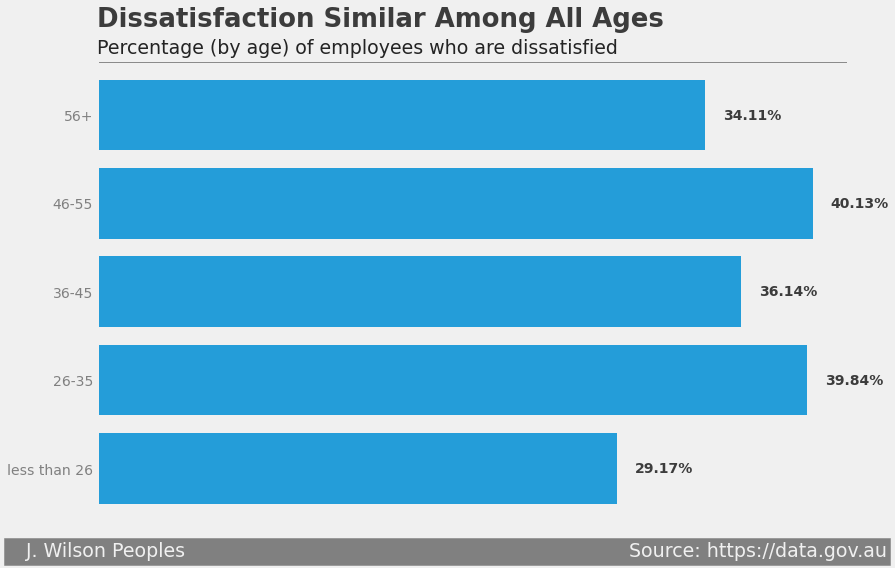

In [66]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
dissatisfied = {}
for age in combined['age'].value_counts().index.to_list():
    dissatisfied[age] = combined.loc[combined.loc[:,'age'] == age,'dissatisfied'].mean()
ages = ['less than 26', '26-35','36-45','46-55','56+']
dissat_ordered = [dissatisfied[age] for age in ages]

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(ages, dissat_ordered, alpha = .85)
#__________________________________________________________________________

ax.grid(visible = False)  
ax.tick_params(colors = 'grey', which = 'both')                  #remove grid and yticklabels
ax.set_xticklabels([])            #create legend
#ax.yaxis.set_tick_params(rotation = 30)
#__________________________________________________________________________
#Generate title and subtext
ax.text(0,5, 'Dissatisfaction Similar Among All Ages', weight = 'bold', size = 26, alpha = .75)
ax.text(0,4.7, 'Percentage (by age) of employees who are dissatisfied', size = 19, alpha = .85)
ax.axhline(4.6, color='grey', linewidth=1, alpha=0.9,
          xmin=-.5, xmax=1)
#___________________________________________________________________________
#Place proportion values above bars
ax.text(x = -.05, y = -1,
    s = '   J. Wilson Peoples                                                                          Source: https://data.gov.au',
    fontsize = 19, color = '#f0f0f0', backgroundcolor = 'grey')
for i, v in enumerate(dissat_ordered):
    ax.text(v+.01,i, str(round(100*v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)

We see a slight dip in dissatisfaction for workers less than 26. Overall, however, it seems that age plays less of a role in determining satisfaction. Next, we'll take a look at dissatisfaction as a function of how long the employee has worked at his/her institution. 

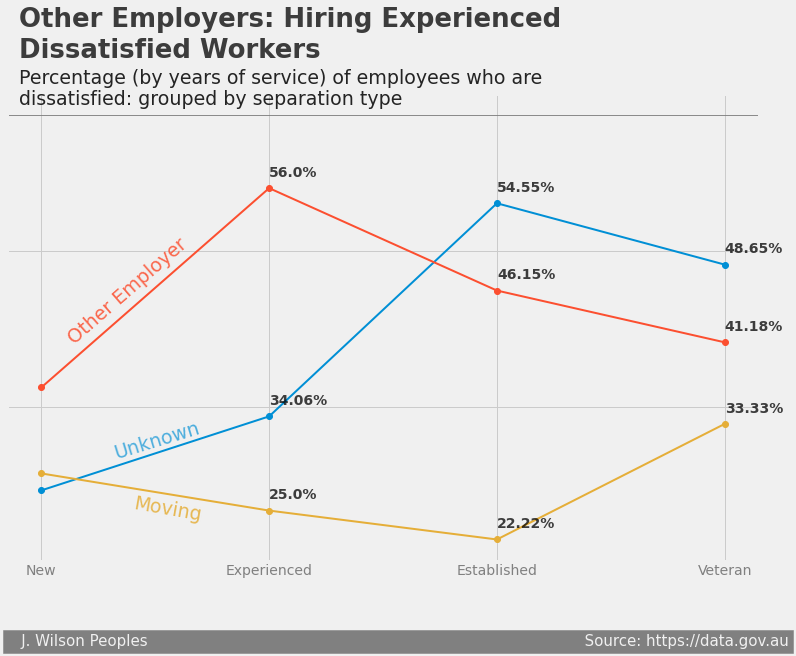

In [127]:
combined_pv = combined.groupby(['separationtype', 'service_cat'])['dissatisfied'].mean()
service_order = ['New', 'Experienced', 'Established', 'Veteran']
sep_types = combined.loc[:,'separationtype'].value_counts().keys().to_list()
plot = {}
for septype in sep_types:
    plot[septype] = [combined_pv[septype][service] for service in service_order]

fig, ax = plt.subplots(figsize = (12,8))


for septype in sep_types:
    ax.plot(service_order,plot[septype], 'o-', linewidth = 2, label = septype)

#__________________________________________________________________________
ax.tick_params(colors = 'grey', which = 'both') 
                   #remove grid and yticklabels
ax.set_yticks([0,.35,.5])
ax.set_yticklabels([])          #create legend
#ax.set_yticks([0,.25,.5,.75])
#ax.legend(fontsize = 10, loc = 'upper left')
#ax.legend(fontsize = 8, bbox_to_anchor=(0, .15), loc='upper left', borderaxespad=0)
#ax.yaxis.set_tick_params(rotation = 30)
#__________________________________________________________________________
#Generate title and subtext
ax.text(-0.1,.715, 'Other Employers: Hiring Experienced', weight = 'bold', size = 26, alpha = .75)
ax.text(-0.1,.685, 'Dissatisfied Workers', weight = 'bold', size = 26, alpha = .75)
ax.text(-0.1,.66, 'Percentage (by years of service) of employees who are', size = 19, alpha = .85)
ax.text(-0.1,.64, 'dissatisfied: grouped by separation type', size = 19, alpha = .85)
ax.text(.31,.30, 'Unknown', size = 19, rotation = 17, c ='#30a2da', alpha = .85)
ax.text(.1,.41, 'Other Employer', size = 19, rotation = 41, c ='#fc4f30', alpha = .85)
ax.text(.40,.24, 'Moving', size = 19, rotation = -10, c ='#e5ae38', alpha = .85)
ax.axhline(.63, color='grey', linewidth=1, alpha=0.9,
          xmin=-.7, xmax=2)
#___________________________________________________________________________
#Place proportion values above bars
ax.text(x = -.15, y = .12,
    s = '   J. Wilson Peoples                                                                                            Source: https://data.gov.au',
    fontsize = 15, color = '#f0f0f0', backgroundcolor = 'grey')

for i, v in enumerate(plot['Unknown']):
    if i == 0:
        pass
    else:
        ax.text(i,v+.015, str(round(100*v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)
for i, v in enumerate(plot['Other employer']):
    if i == 0:
        pass
    else:
        ax.text(i,v+.015, str(round(100*v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)
for i, v in enumerate(plot['Move overseas/interstate']):
    if i == 0:
        pass
    else:
        ax.text(i,v+.015, str(round(100*v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)


Overall, newer employees who resign do not seem more likely to be dissatisfied than an employee who resigns at any other stage in his/her career. In fact, new employees are the least likely to be dissatisfied. We do see, however, that new and experienced employees who are disatisfied often leave for another employer. 

To get a better picture of the overall trend, we'll look at the same plot without separating based on separationtype. 

/tmp/ipykernel_801/2742531742.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','30%','35%','40%','45%','50%','55%']);              #remove grid and yticklabels           #create legend


Text(-0.29, -0.13, '   J. Wilson Peoples                                                                                            Source: https://data.gov.au')

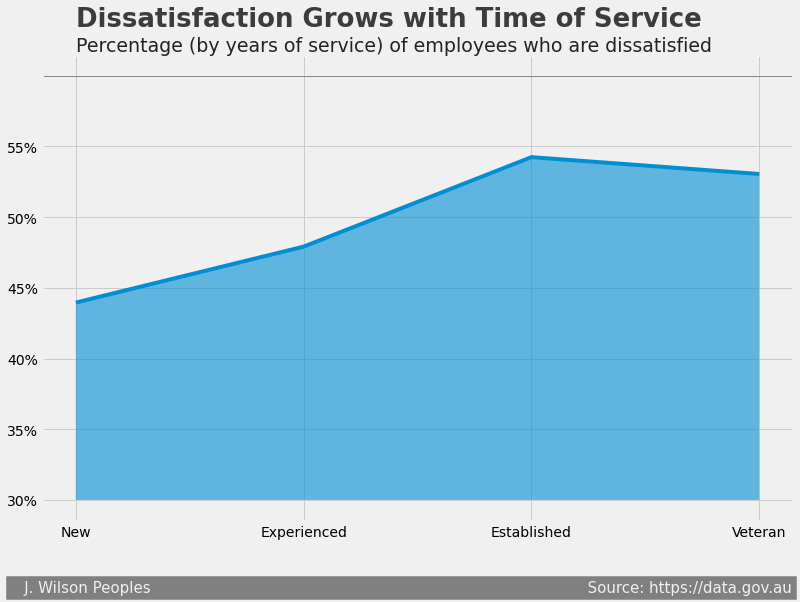

In [148]:
combined_pv = combined.groupby(['service_cat'])['dissatisfied'].mean()
service_order = ['New','Experienced', 'Established', 'Veteran']
sep_types = combined.loc[:,'separationtype'].value_counts().keys().to_list()
plot = [combined_pv[service] for service in service_order]
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(service_order,plot);

#__________________________________________________________________________
ax.tick_params(color = 'grey', which = 'both');
ax.grid(visible = True);   
ax.set_yticklabels(['','30%','35%','40%','45%','50%','55%']);              #remove grid and yticklabels           #create legend
ax.axhline(.60, color='grey', linewidth=1, alpha=0.9,
          xmin=-.7, xmax=2);
#__________________________________________________________________________
#Generate title and subtext
ax.text(0,.67, 'Dissatisfaction Grows with Time of Service', weight = 'bold', size = 26, alpha = .75)
ax.text(0,.635, 'Percentage (by years of service) of employees who are dissatisfied', size = 19, alpha = .85)
#___________________________________________________________________________
ax.fill_between(service_order,plot, alpha = .6)


ax.text(x = -.29, y = -.13,
    s = '   J. Wilson Peoples                                                                                            Source: https://data.gov.au',
    fontsize = 15, color = '#f0f0f0', backgroundcolor = 'grey')


We notice that new employees are actually the least likely to be dissatisfied. The previous two plots together paint a picture of new hires who resign due to other employment opportunities, and not neccesarily dissatisfaction. When employees resign after a few years, however, dissatisfaction seems to occur more often. Even more so this is the case when employees resign after 7-11 years (the Established category). Resignations for Veterans, however, could be retirement related. This would explain a slight dropoff in dissatisfaction for employees of more than 11 years. 

It's plausible that worker disatisfaction is related to external, worldly sitatuions. For instance, perhaps worker distatisfaction is growing with some overall public sentiment. If this is the case, we should be able to detect a trend between percentage of worker dissatisfaction and year of resignation. If we detect no trend, however, then it suggests that worker disatisfaction   We'll investigate this with the following plot. 

Text(2008.4, -53, '   J. Wilson Peoples                                                                                                                                  Source: https://data.gov.au')

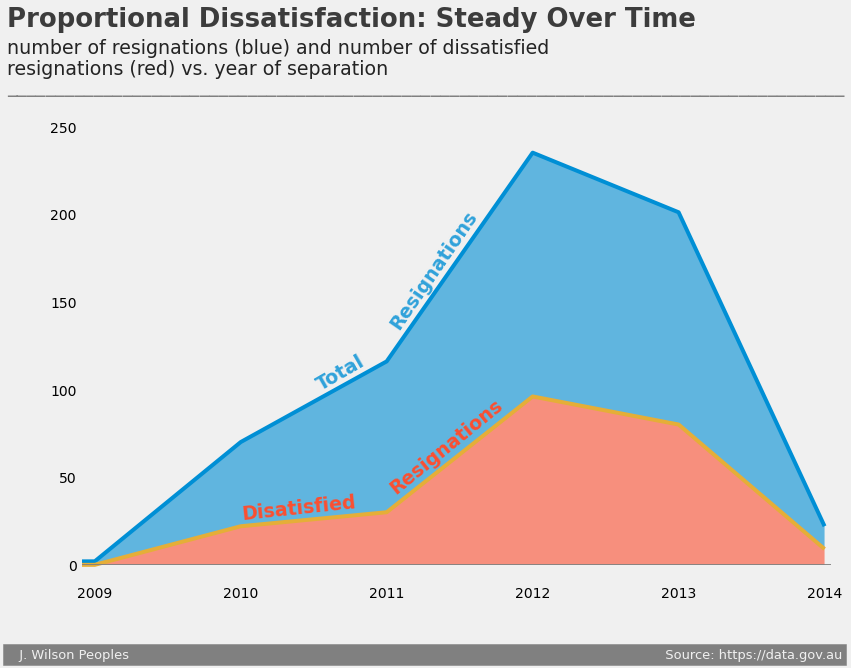

In [305]:
combined_pv = combined.groupby(['cease_date'])['dissatisfied'].sum()
combined_pv.index.to_list()
combined_pv = combined.groupby(['cease_date'])['dissatisfied'].sum()
cease_years = combined_pv.index.to_list()
plot = [combined_pv[year] for year in cease_years]

combined_count = combined.groupby(['cease_date'])['dissatisfied'].count()
plot2 = [combined_count[year] for year in cease_years]
fig, ax = plt.subplots(figsize = (12,8))
x_axis = cease_years    #create numeric axis for purpose of shifting

#create bar plots
ax.tick_params(color = 'grey', which = 'both')
ax.plot([year for year in cease_years], plot2, .4, label = 'Total worker resignations')
ax.plot([year for year in cease_years], plot, .2, label = 'Dissatisfied worker resignations')
ax.set_xlim([2008.9,2014.05])
ax.set_ylim([-10,256])

#__________________________________________________________________________

ax.grid(visible = False)                #remove grid and yticklabels           #create legend
ax.axhline(.60, color='grey', linewidth=1, alpha=0.9,
          xmin=-.7, xmax=2)
#__________________________________________________________________________
#Generate title and subtext
ax.fill_between(cease_years,plot,plot2, alpha = .6)
ax.fill_between(cease_years,plot, alpha = .6)
ax.text(2008.4,307, 'Proportional Dissatisfaction: Steady Over Time', weight = 'bold', size = 26, alpha = .75)
ax.text(2008.4,292, 'number of resignations (blue) and number of dissatisfied', size = 19, alpha = .85)
ax.text(2008.4,280, 'resignations (red) vs. year of separation', size = 19, alpha = .85)
ax.text(2008.4, 270, "_______________________________________________________________________________________", size = 19, color =  'grey')

#___________________________________________________________________________
#generate text on graph
ax.text(2010.5,100, 'Total', size = 19, fontweight = 'bold', rotation = 30, c ='#30a2da')
ax.text(2011,135, 'Resignations', size = 19, fontweight = 'bold', rotation = 55.5, c ='#30a2da')
ax.text(2010,26, 'Disatisfied', size = 19, fontweight = 'bold', rotation = 6, c ='#fc4f30') 
ax.text(2011,41, 'Resignations', size = 19, fontweight = 'bold', rotation = 39, c ='#fc4f30') 

ax.tick_params(color = 'grey', which = 'both')

ax.text(x = 2008.4, y = -53,
    s = '   J. Wilson Peoples                                                                                                                                  Source: https://data.gov.au',
    fontsize = 13, color = '#f0f0f0', backgroundcolor = 'grey')

We see that the proportion of workers who resign due to dissatisfaction does not vary too much with the year. I.e., as the blue increases/decreases, so too does the red. This suggests that worker satisfaction is relatively insulated from worldly/national events. We remark that this is a trend seen only through years 2009-2014. We suspect that more recent data (collected during the COVID-19 pandemic) would suggest otherwise.  

### Insitutional Analysis
Now, we'll investigate the differences between DETE employees and TAFE employees. Let's begin by comparing overall dissatisfaction. 

Text(-0.5, -7, '   J. Wilson Peoples                                                                                                                  Source: https://data.gov.au')

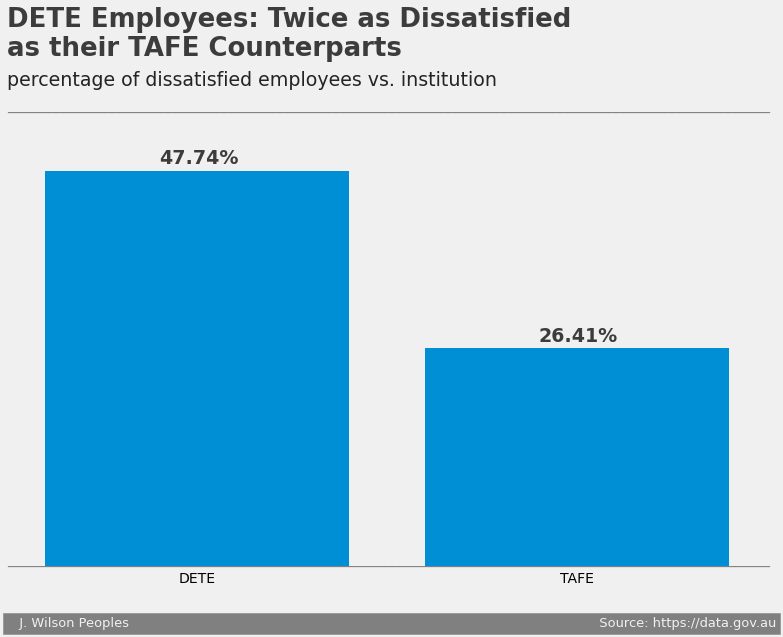

In [220]:
dissat_props = combined.groupby(['institute'])['dissatisfied'].sum()/combined.groupby(['institute'])['dissatisfied'].count()
fig, ax = plt.subplots(figsize = (12,8))


x_axis = dissat_props.index.to_list()
y_axis = [100*dissat_props[institute] for institute in x_axis]
ax.bar(x_axis, y_axis)
ax.set_yticklabels([])
ax.grid(visible = False)
ax.text(-.5, .5, '_____________________________________________________________________________________________________________', color = 'grey')
ax.set_ylim([0,56])
ax.text(-0.5,65, 'DETE Employees: Twice as Dissatisfied', weight = 'bold', size = 26, alpha = .75)
ax.text(-0.5,61.5, 'as their TAFE Counterparts', weight = 'bold', size = 26, alpha = .75)
ax.text(-0.5,58, 'percentage of dissatisfied employees vs. institution', size = 19, alpha = .85)
ax.text(-.5, 55, '_____________________________________________________________________________________________________________', color = 'grey')
ax.tick_params(color = 'grey', which = 'both')

for i, v in enumerate(y_axis):
    ax.text(i-.1,v+1.5, str(round(v,2)) + '%', color='black', fontweight='bold', fontsize=19, ha='left', va='center', alpha = .75)


ax.text(x = -.5, y = -7,
    s = '   J. Wilson Peoples                                                                                                                  Source: https://data.gov.au',
    fontsize = 13, color = '#f0f0f0', backgroundcolor = 'grey')
        

We see that DETE employees are nearly two times as dissatisfied as their TAFE counterparts. This is a big difference between institutions. 

In line with the previous discussion, it would be interesting to see how stage of career and dissatisfaction level differs between these institutions. Let's investigate this with the following plot.

Text(-0.6, -7, '   J. Wilson Peoples                                                                                                                     Source: https://data.gov.au')

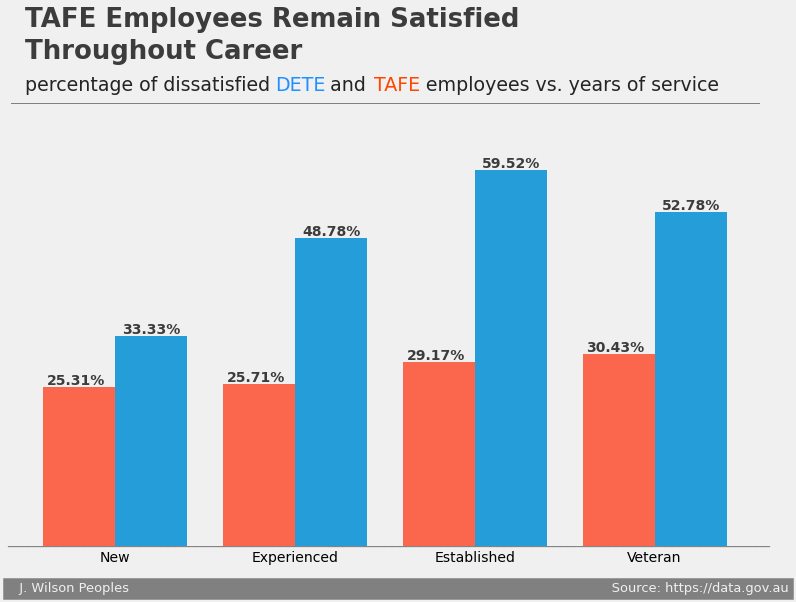

In [286]:
data = combined.groupby(['service_cat','institute'])['dissatisfied'].sum()/combined.groupby(['service_cat','institute'])['dissatisfied'].count()
Dete_data = [100*data[service, 'DETE'] for service in service_order]
Tafe_data = [100*data[service,'TAFE'] for service in service_order]
fig,ax = plt.subplots(figsize = (12,8))
x_axis = np.arange(len(service_order))
ax.bar(x_axis + .2, Dete_data,.4, label = 'DETE', alpha = .85)
ax.bar(x_axis - .2,Tafe_data,.4,label = 'TAFE', alpha = .85)
ax.set_xticks(x_axis,service_order)
ax.set_yticklabels([])
ax.grid(visible=False)
ax.text(-0.5,82, 'TAFE Employees Remain Satisfied', weight = 'bold', size = 26, alpha = .75)
ax.text(-0.5,77, 'Throughout Career', weight = 'bold', size = 26, alpha = .75)
ax.text(-0.5,72, 'percentage of dissatisfied          and          employees vs. years of service', size = 19, alpha = .85)
ax.axhline(70, color='grey', linewidth=1, alpha=1,
          xmin=0, xmax=1)
for i, v in enumerate(Dete_data):
    ax.text(i+.04,v+1, str(round(v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)
for i, v in enumerate(Tafe_data):
    ax.text(i-.38,v+1, str(round(v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)

ax.text(x= .89, y = 72, s = "DETE", color = 'dodgerblue', size = 19)

ax.text(x= 1.44, y = 72, s = "TAFE", color = 'orangered', size = 19)

ax.text(-.6, .5, '_____________________________________________________________________________________________________________', color = 'grey')


ax.text(x = -.6, y = -7,
    s = '   J. Wilson Peoples                                                                                                                     Source: https://data.gov.au',
    fontsize = 13, color = '#f0f0f0', backgroundcolor = 'grey')
        

We see that while DETE employees become increasingly dissatisfied throughout their career, TAFE employees retain the same level of dissatisfaction. We also remark that newer DETE employees are only slightly more likely to be dissatisfied than DETE employees. 

Another interesting trend to investigate is how dissatisfaction varies with position. For instance, are administrators much more likely to be satisfied than teaching staff? Let's create a plot that will answer this question, in addition to many others. 

Text(-0.6, -7, '   J. Wilson Peoples                                                                                                                     Source: https://data.gov.au')

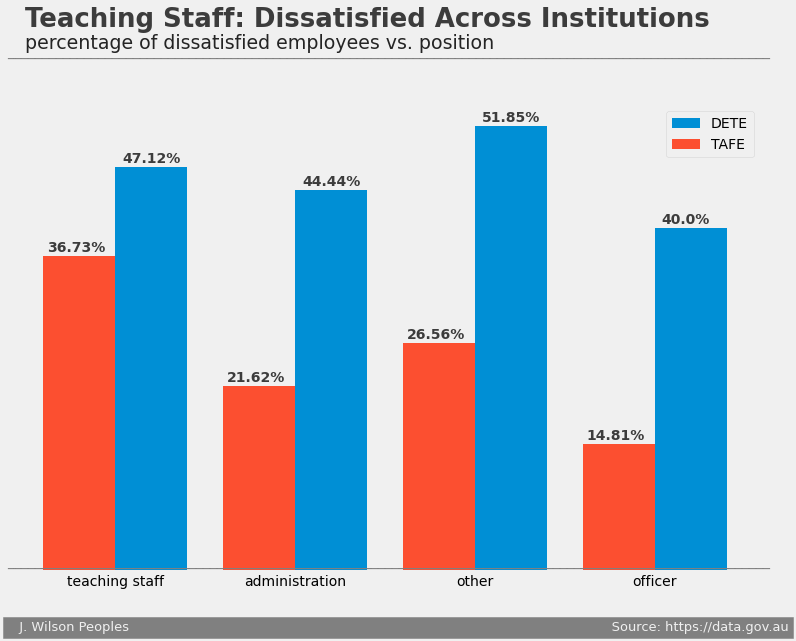

In [256]:
data = combined.groupby(['position','institute'])['dissatisfied'].sum()/combined.groupby(['position','institute'])['dissatisfied'].count()
position_order = combined['position'].value_counts().index.to_list()
Dete_data = [100*data[position, 'DETE'] for position in position_order]
Tafe_data = [100*data[position, 'TAFE'] for position in position_order]
fig,ax = plt.subplots(figsize = (12,8))
x_axis = np.arange(len(position_order))
ax.bar(x_axis + .2, Dete_data,.4, label = 'DETE')
ax.bar(x_axis - .2,Tafe_data,.4,label = 'TAFE')
ax.set_xticks(x_axis,position_order)
ax.set_yticklabels([])
ax.legend(bbox_to_anchor=(.5, .5, 0.5, 0.5))
ax.grid(visible=False)
ax.text(-0.5,63.5, 'Teaching Staff: Dissatisfied Across Institutions', weight = 'bold', size = 26, alpha = .75)
ax.text(-0.5,61, 'percentage of dissatisfied employees vs. position', size = 19, alpha = .85)
ax.text(-.6, 60, '_____________________________________________________________________________________________________________', color = 'grey')
for i, v in enumerate(Dete_data):
    ax.text(i+.04,v+1, str(round(v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)
for i, v in enumerate(Tafe_data):
    ax.text(i-.38,v+1, str(round(v,2)) + '%', color='black', fontweight='bold', fontsize=14, ha='left', va='center', alpha = .75)


ax.text(-.6, .5, '_____________________________________________________________________________________________________________', color = 'grey')


ax.text(x = -.6, y = -7,
    s = '   J. Wilson Peoples                                                                                                                     Source: https://data.gov.au',
    fontsize = 13, color = '#f0f0f0', backgroundcolor = 'grey')

Its clear that teaching staff is among the most dissatisfied positions regardless of institution. Interestingly, while TAFE administration is notiably more satsified than TAFE teaching staff, this difference is not nearly as emphatic among DETE employees. Namely, 44.44% of DETE administrators are dissatisfied, which is comparable to the dissatisfaction level of DETE teaching staff (47.12%). We also see TAFE officers significantly more satisfied than their DETE counterparts. 

One final trend to investigate is how gender relates to dissatisfaction for DETE/TAFE employees. Let's take a look.



Text(-1.3, -1.5, '   J. Wilson Peoples                                                                                                                     Source: https://data.gov.au')

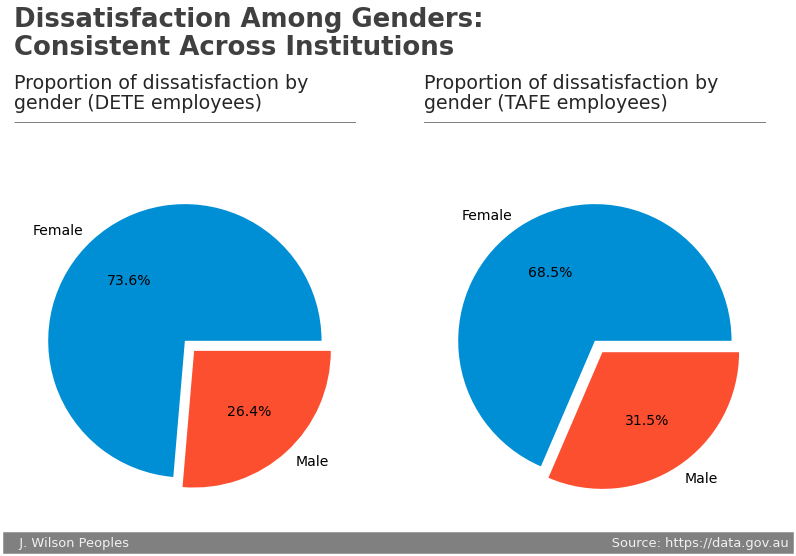

In [302]:
DETE_data = combined[(combined['dissatisfied'] == True) &(combined['institute'] == 'DETE')]
DETE_data = 100*DETE_data['gender'].value_counts(normalize = True)
gender_list = combined['gender'].value_counts().index.to_list()
TAFE_data = combined[(combined['dissatisfied'] == True) &(combined['institute'] == 'TAFE')]
TAFE_data = 100*TAFE_data['gender'].value_counts(normalize = True)
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))
fig.set_facecolor('white')
explode = (0, 0.1)
ax[0].pie(DETE_data, explode = explode, labels = gender_list, autopct='%1.1f%%')
ax[1].pie(TAFE_data, explode = explode, labels = gender_list, autopct='%1.1f%%')
ax[0].text(-1.25,2.3, 'Dissatisfaction Among Genders:', weight = 'bold', size = 26, alpha = .75)
ax[0].text(-1.25,2.10, 'Consistent Across Institutions', weight = 'bold', size = 26, alpha = .75)
ax[0].set_ylim([0,2])
ax[1].set_ylim([0,2])
ax[0].axhline(1.6, color='grey', linewidth=1, alpha=1,
          xmin=0, xmax=20)
ax[1].axhline(1.6, color='grey', linewidth=1, alpha=1,
          xmin=-10, xmax=10)
ax[0].text(-1.25,1.85, 'Proportion of dissatisfaction by', size = 19, alpha = .85)
ax[0].text(-1.25,1.7, 'gender (DETE employees)', size = 19, alpha = .85)
ax[1].text(-1.25,1.85, 'Proportion of dissatisfaction by', size = 19, alpha = .85)
ax[1].text(-1.25,1.7, 'gender (TAFE employees)', size = 19, alpha = .85)

ax[0].text(x = -1.3, y = -1.5,
    s = '   J. Wilson Peoples                                                                                                                     Source: https://data.gov.au',
    fontsize = 13, color = '#f0f0f0', backgroundcolor = 'grey')


We see that gender doesn't seem to be too indicative of dissatisfaction, and that both institutions see a similar trend. 

# Conclusion 

In this notebook, we investigated DETE and TAFE employee exit surveys. After carefully cleaning and combining the data, we were able to look at some overall trends among employees, as well as trends that persisted only within a given institution.

We found that overall, very young employees tend to be slightly more satisfied. As employees gain experience, they become increasingly dissatisfied. Interestingly, proportion of dissatisfied workers (who resigned) seems to remain relatively stable, while the total number of resignations varies greatly year to year. 

In the insitutional analysis, we noticed that DETE employees are significantly more likely to be dissatisfied than TAFE employees. While similar trends of dissatisfaction and how it relates to years of service and gender occured across both institutions, positional trends were significantly different. Namely, the TAFE institution saw a high level of dissatisfaction among teaching staff, but much lower levels among officers and administration. DETE, however, had comparable levels of dissatisfaction across the board. This suggests that the DETE organization should look into the specific responsibilities for these positions, and how it compares to other institutions. 

To address the initial questions to prompt the analysis, in summary we observed that:

 - Employees which have worked for a short period of time are less likely to be resigning due to dissatisfaction. 
 - When newer employees are dissatisfied, they often leave for another employer. 
 - Employees that spend a longer time at the company are much more likely to be resigning due to dissatisfaction. This could be due to many factors, such as boredom, perceived lack of appreiation, etc.
 - DETE employees are quite often resigning due to dissatisfaction. This is not the case for TAFE employees.  
 - DETE's higher rates of dissatisfaction among administration and officers specifically suggests a starting point for DETE to address the high levels of dissatisfaction. 

That completes the analysis! Thanks for reading my notebook, and have a great day!

![bye](figures/good-bye-simpsons.gif)
 